<a href="https://www.kaggle.com/code/owaiskhan9654/gene-sequence-analysis-for-sars-cov-egfr-influenza?scriptVersionId=102765120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.canarydetect.com/"><img src="https://raw.githubusercontent.com/Owaiskhan9654/Gene-Sequence-Primer-/main/Canary%20Logo.jpg"></a>

<center><b>Visit Company website by clicking on the Logo</b></center>


# **<span style="color:#4086f7;font-size:20px">Gene and Primer Sequence Analysis for SARS-CoV-2, EGFR(Non Small Lung Cancer Cell), Influenza DNAs</span>**

 ### This Notebook is Created by [**Owais Ahmad**](https://www.linkedin.com/in/owaiskhan9654/) for SARS-CoV-2 Gene Sequence Analysis.
 ### This is for Medical Research Purpose only.
 
 
 
- **Email owaiskhan9654@gmail.com**
- **Contact +919515884381**

## First time setup - Generating credentials
1. Sign in or create a new IDT account [here](https://www.idtdna.com/site/account?returnurl=/site/account/api).
2. Go to your user name drop down menu at the top right of the page, and select My account.
3. Click the API access link.
4. Click the Request new API key button.
5. Append those 4 secret in Kaggle Add-ons
6. Comment down for any help.

### How can I check my Oligo primers to ensure there are no significant primer design issues?
- The difference between melting temperatures (Tm) of the primers should be less than 5°C.
- The GC content should be between 35-80% or equivalent to the product being amplified.
- The Delta G value of any self-dimers, hairpins, and heterodimers should be weaker (more positive) than -9.0 kcal/mole. Positive numbers indicate that the actual secondary structure shown will not form at all.
- Avoid 3' complementarity between the two primers to prevent primer dimers.
The IDT OligoAnalyzer APIs can be used to assess these different criteria for a proposed oligo. 
#### [Reference](https://sg.idtdna.com/pages/support/faqs/how-can-i-check-my-pcr-primers-using-the-oligoanalyzer-program-to-ensure-there-are-no-significant-primer-design-issues-)

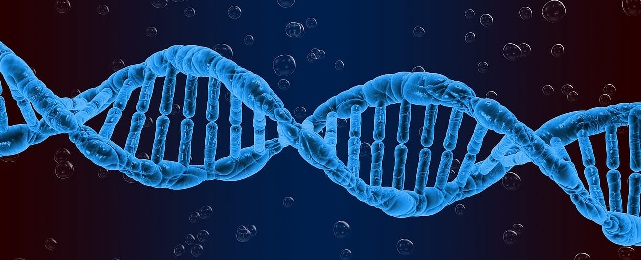

# **<span style="color:#4086f7;">Basic Library Installations</span>**

In [1]:
!pip install -q openpyxl

In [2]:
from __future__ import print_function
from base64 import b64encode
import json
from urllib import request, parse
import pandas as pd
import requests
import pandas as pd
from tqdm.notebook import tqdm
from functools import reduce
from kaggle_secrets import UserSecretsClient

# **<span style="color:#4086f7; font-size:18px">Secret Token Fetch from IDT-DNA. Note this will expire in 10 Mins and if you have a very long set of sequence to perform analysis then call below function again to get new Secret token</span>**

In [3]:
def get_bearer_token(client_id, client_secret, idt_username, idt_password):


    authorization_string = b64encode(bytes(client_id + ":" + client_secret, "utf-8")).decode()
    request_headers = { "Content-Type" : "application/x-www-form-urlencoded",
                        "Authorization" : "Basic " + authorization_string }
                    
    data_dict = {   "grant_type" : "password", "scope" : "test","username" : idt_username,"password" : idt_password }
    request_data = parse.urlencode(data_dict).encode()

    post_request = request.Request("https://www.idtdna.com/Identityserver/connect/token", data = request_data, headers = request_headers,method = "POST")

    response = request.urlopen(post_request)

    body = response.read().decode()
    
    if (response.status != 200):
        raise RuntimeError("Request failed with error code:" + str(response.status) + "\nBody:\n" + body)
    
    body_dict = json.loads(body)
    return body_dict["access_token"]
    
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("IDT_password_here")
secret_value_1 = user_secrets.get_secret("IDT_username_here")
secret_value_2 = user_secrets.get_secret("client_id_here")
secret_value_3 = user_secrets.get_secret("client_secret_here")
    
client_id = str(secret_value_2)
client_secret = str(secret_value_3)
idt_username = str(secret_value_1)
idt_password = str(secret_value_0)


token = get_bearer_token(client_id, client_secret, idt_username, idt_password)
print("Secret Token Fetched (This will expire in 10 minutes): ",token)


Secret Token Fetched (This will expire in 10 minutes):  c7adab9d36e0f8a43664dc398cc78322


# **<span style="color:#4086f7; font-size:18px">Here SARS-CoV-2 Gene Sequences are fetched from csv file which is stored on GitHub. This we get from blasting on NCBI</span>**

In [4]:
url="https://github.com/Owaiskhan9654/Gene-Sequence-Primer-/blob/main/NEB%20Primer%20Sequence.xlsx?raw=true"
# Sequence fetch for Analysis

response = requests.get(url)

dest = 'GENE Primer Sequence.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

GENE_df = pd.read_excel("GENE Primer Sequence.xlsx", sheet_name=2,header=1).dropna()
GENE_df.reset_index(drop=True,inplace=True)
GENE_df.columns

Index(['Primer name', 'Sequence', 'Synthesis scale'], dtype='object')

In [5]:
GENE_df.to_csv('SARS-CoV-2_Primer_Sequences.csv',index=False)

In [6]:
GENE_df

,Primer name,Sequence,Synthesis scale
0,Gene-E1-F3,TGAGTACGAACTTATGTACTCAT,10 nm
1,Gene-E1-B3,TTCAGATTTTTAACACGAGAGT,10 nm
2,Gene-E1-FIP,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,10 nm
3,Gene-E1-BIP,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,10 nm
4,Gene-E1-LF,CGCTATTAACTATTAACG,10 nm
5,Gene-E1-LB,GCGCTTCGATTGTGTGCGT,10 nm
6,N2-F3,ACCAGGAACTAATCAGACAAG,10 nm
7,N2-B3,GACTTGATCTTTGAAATTTGGATCT,10 nm
8,N2-FIP,TTCCGAAGAACGCTGAAGCGGAACTGATTACAAACATTGGCC,10 nm
9,N2-BIP,CGCATTGGCATGGAAGTCACAATTTGATGGCACCTGTGTA,10 nm


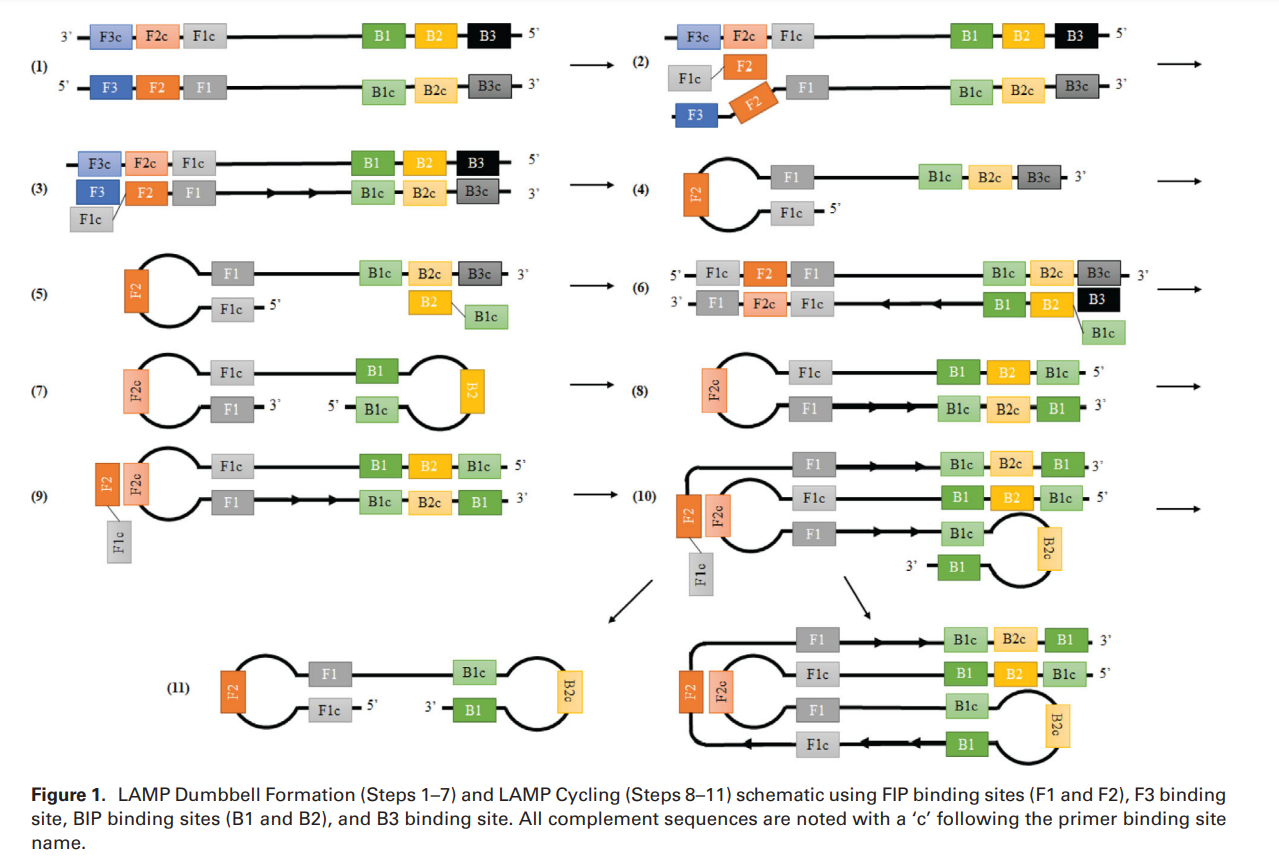

In [7]:
Sequence_dict = {}

for i in GENE_df.index:
    Sequence_dict[GENE_df['Sequence'][i]] = GENE_df['Primer name'][i]

Sequence_dict

Primer_dict = {}

for i in GENE_df.index:
    Primer_dict[GENE_df['Primer name'][i]] = GENE_df['Sequence'][i]

Primer_dict

{'Gene-E1-F3': 'TGAGTACGAACTTATGTACTCAT',
 'Gene-E1-B3': 'TTCAGATTTTTAACACGAGAGT',
 'Gene-E1-FIP': 'ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG',
 'Gene-E1-BIP': 'TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT',
 'Gene-E1-LF': 'CGCTATTAACTATTAACG',
 'Gene-E1-LB': 'GCGCTTCGATTGTGTGCGT',
 'N2-F3': 'ACCAGGAACTAATCAGACAAG',
 'N2-B3': 'GACTTGATCTTTGAAATTTGGATCT',
 'N2-FIP': 'TTCCGAAGAACGCTGAAGCGGAACTGATTACAAACATTGGCC',
 'N2-BIP': 'CGCATTGGCATGGAAGTCACAATTTGATGGCACCTGTGTA',
 'N2-LF': 'GGGGGCAAATTGTGCAATTTG',
 'N2-LB': 'CTTCGGGAACGTGGTTGACC',
 'ACTB-F3': 'AGTACCCCATCGAGCACG',
 'ACTB-B3': 'AGCCTGGATAGCAACGTACA',
 'ACTB-FIP': 'GAGCCACACGCAGCTCATTGTATCACCAACTGGGACGACA',
 'ACTB-BIP': 'CTGAACCCCAAGGCCAACCGGCTGGGGTGTTGAAGGTC',
 'ACTB-LF': 'TGTGGTGCCAGATTTTCTCCA',
 'ACTB-LB': 'CGAGAAGATGACCCAGATCATGT'}

In [8]:
%%time

headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'Authorization': 'Bearer '+token,
}

Primer_Name = []
Sequence = []
Complement = []
length = []
GCContent = []
MeltTemp = []
NmoleOD = []
OligoConc_list = []
MgConc_list = []
NaConc_list = []
dNTPsConc_list = []
NucleotideType_list=[]
count = 0
for i in tqdm(GENE_df.index):
    Primer_Name1=GENE_df.iloc[i]['Primer name']
#     print(Primer_Name1)
    oligo_Conc_dict={'F3':0.2,'B3':0.2,'Fip':1.6,'Bip':1.6,'Lf':0.4,'Bf':0.4} 
    dntp_Conc_dict={'F3':1.4,'B3':1.4,'Fip':1.4,'Bip':1.4,'Lf':1.4,'Bf':1.4} 
    mg_Conc_dict={'F3':8,'B3':8,'Fip':8,'Bip':8,'Lf':8,'Bf':8} 
    Na_Conc_dict={'F3':50,'B3':50,'Fip':50,'Bip':50,'Lf':50,'Bf':50}
    if 'F3' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['F3'],dntp_Conc_dict['F3'],mg_Conc_dict['F3'],Na_Conc_dict['F3']
    elif 'B3' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['B3'],dntp_Conc_dict['B3'],mg_Conc_dict['B3'],Na_Conc_dict['B3']
    elif 'FIP' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['Fip'],dntp_Conc_dict['Fip'],mg_Conc_dict['Fip'],Na_Conc_dict['Fip']
    elif 'BIP' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['Bip'],dntp_Conc_dict['Bip'],mg_Conc_dict['Bip'],Na_Conc_dict['Bip']
    elif 'LF' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['Lf'],dntp_Conc_dict['Lf'],mg_Conc_dict['Lf'],Na_Conc_dict['Lf']
    elif 'BF' in Primer_Name1:
        oligo_Conc,dntp_Conc,mg_Conc,Na_Conc=oligo_Conc_dict['Bf'],dntp_Conc_dict['Bf'],mg_Conc_dict['Bf'],Na_Conc_dict['Bf']
    
    #print(oligo_Conc)
    NucleotideType="DNA"
    data = '{  "Sequence": "' + GENE_df.iloc[i]['Sequence'] + '",  "NaConc": '+  str(Na_Conc)+\
    ',  "MgConc": '+  str(mg_Conc)+',   "dNTPsConc": '+  str(dntp_Conc)+',  "OligoConc": '+  str(oligo_Conc)+\
    ',   "NucleotideType": "DNA" }'
    response = requests.post(
        'https://www.idtdna.com/Restapi/v1/OligoAnalyzer/Analyze',
        headers=headers,
        data=data)
    json_data = json.loads(response.text)
    Primer_Name.append(Sequence_dict[json_data['Sequence'].replace(" ", '')])
    Sequence.append(json_data['Sequence'])
    Complement.append(json_data['Complement'])
    length.append(json_data['Length'])
    GCContent.append(json_data['GCContent'])
    MeltTemp.append(json_data['MeltTemp'])
    NmoleOD.append(json_data['NmoleOD'])
    OligoConc_list.append(json_data['OligoConc'])
    MgConc_list.append(mg_Conc)
    NaConc_list.append(Na_Conc)
    dNTPsConc_list.append(dntp_Conc)
    NucleotideType_list.append(NucleotideType)


df1=pd.DataFrame({"Primer Name":Primer_Name, "Sequence":Sequence,"Complement":Complement,"OligoConc":OligoConc_list,"Na+ Conc":NaConc_list,\
                  "Mg++ Conc":MgConc_list,"dNTPs Conc":dNTPsConc_list,"Nucleotide Type":NucleotideType_list,"length":length,"GCContent":GCContent,"MeltTemp":MeltTemp,"NmoleOD":NmoleOD,})



  0%|          | 0/18 [00:00<?, ?it/s]

CPU times: user 419 ms, sys: 25.9 ms, total: 445 ms
Wall time: 18.2 s


# **<span style="color:#4086f7; font-size:22px">In this below DataFrame you can check for Length of Formation, Its GC content, Melting Temperature, and NmoleOD  </span>**

In [9]:
df1

,Primer Name,Sequence,Complement,OligoConc,Na+ Conc,Mg++ Conc,dNTPs Conc,Nucleotide Type,length,GCContent,MeltTemp,NmoleOD
0,Gene-E1-F3,TGA GTA CGA ACT TAT GTA CTC AT,ATG AGT ACA TAA GTT CGT ACT CA,0.2,50,8,1.4,DNA,23,34.8,61.0,4.40
1,Gene-E1-B3,TTC AGA TTT TTA ACA CGA GAG T,ACT CTC GTG TTA AAA ATC TGA A,0.2,50,8,1.4,DNA,22,31.8,60.4,4.57
2,Gene-E1-FIP,ACC ACG AAA GCA AGA AAA AGA AGT TCG TTT CGG AA...,CTG TCT CTT CCG AAA CGA ACT TCT TTT TCT TGC TT...,1.6,50,8,1.4,DNA,42,42.9,75.8,2.26
3,Gene-E1-BIP,TTG CTA GTT ACA CTA GCC ATC CTT AGG TTT TAC AA...,ACG TGA GTC TTG TAA AAC CTA AGG ATG GCT AGT GT...,1.6,50,8,1.4,DNA,44,40.9,75.4,2.41
4,Gene-E1-LF,CGC TAT TAA CTA TTA ACG,CGT TAA TAG TTA ATA GCG,0.4,50,8,1.4,DNA,18,33.3,53.4,5.69
5,Gene-E1-LB,GCG CTT CGA TTG TGT GCG T,ACG CAC ACA ATC GAA GCG C,0.4,50,8,1.4,DNA,19,57.9,68.6,5.86
6,N2-F3,ACC AGG AAC TAA TCA GAC AAG,CTT GTC TGA TTA GTT CCT GGT,0.2,50,8,1.4,DNA,21,42.9,61.2,4.52
7,N2-B3,GAC TTG ATC TTT GAA ATT TGG ATC T,AGA TCC AAA TTT CAA AGA TCA AGT C,0.2,50,8,1.4,DNA,25,32.0,62.2,4.20
8,N2-FIP,TTC CGA AGA ACG CTG AAG CGG AAC TGA TTA CAA AC...,GGC CAA TGT TTG TAA TCA GTT CCG CTT CAG CGT TC...,1.6,50,8,1.4,DNA,42,47.6,77.6,2.43
9,N2-BIP,CGC ATT GGC ATG GAA GTC ACA ATT TGA TGG CAC CT...,TAC ACA GGT GCC ATC AAA TTG TGA CTT CCA TGC CA...,1.6,50,8,1.4,DNA,40,47.5,77.5,2.59


In [10]:
!mkdir "Output Data GENE Analysis"

In [11]:
df1.to_csv('Output Data GENE Analysis/GENE_Analysis.csv', index=False)

In [12]:
%%time

Primer_Name = []
Sequence = []
Thermo = []
DeltaS = []
DeltaG = []
DeltaH = []

count = 0

for i in tqdm(list(GENE_df.Sequence)):
    data = '{  "Sequence": "' + i + '",  "NaConc": 50,  "FoldingTemp": 37,\
    "MgConc": 8, "NucleotideType": "DNA" }'
    response = requests.post(
        'https://www.idtdna.com/Restapi/v1/OligoAnalyzer/Hairpin',
        headers=headers,
        data=data)
    json_data = json.loads(response.text)
    Primer_Name.append(Sequence_dict[json_data[0]['sequence']])
    Sequence.append(json_data[0]['sequence'])
    Thermo.append(json_data[0]['thermo'])
    DeltaS.append(json_data[0]['deltaS'])
    DeltaG.append(json_data[0]['deltaG'])
    DeltaH.append(json_data[0]['deltaH'])

df2 = pd.DataFrame({
    "Primer Name": Primer_Name,
    "Sequence": Sequence,
    "Thermo": Thermo,
    "DeltaG": DeltaG,
    "DeltaS": DeltaS,
    "DeltaH": DeltaH,
})



  0%|          | 0/18 [00:00<?, ?it/s]

CPU times: user 412 ms, sys: 36.9 ms, total: 449 ms
Wall time: 17.6 s


# **<span style="color:#4086f7; font-size:22px">If the highest hairpin Tm is at or above your annealing temperature, that hairpin is likely to impede hybridization</span>**

In [13]:
df2

,Primer Name,Sequence,Thermo,DeltaG,DeltaS,DeltaH
0,Gene-E1-F3,TGAGTACGAACTTATGTACTCAT,45.9,-3.59,-172.08,-54.9
1,Gene-E1-B3,TTCAGATTTTTAACACGAGAGT,30.9,-0.23,-38.81,-11.8
2,Gene-E1-FIP,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,42.6,-1.77,-100.40,-31.7
3,Gene-E1-BIP,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,49.1,-3.46,-143.67,-46.3
4,Gene-E1-LF,CGCTATTAACTATTAACG,15.7,0.67,-72.02,-20.8
5,Gene-E1-LB,GCGCTTCGATTGTGTGCGT,39.4,-1.62,-112.64,-35.2
6,N2-F3,ACCAGGAACTAATCAGACAAG,40.8,-0.39,-24.52,-7.7
7,N2-B3,GACTTGATCTTTGAAATTTGGATCT,29.8,-0.63,-130.72,-39.6
8,N2-FIP,TTCCGAAGAACGCTGAAGCGGAACTGATTACAAACATTGGCC,41.5,-3.16,-191.67,-60.3
9,N2-BIP,CGCATTGGCATGGAAGTCACAATTTGATGGCACCTGTGTA,34.1,-1.08,-118.45,-36.4


In [14]:
df2.to_csv('Output Data GENE Analysis/GENE_HairPins.csv', index=False)

In [15]:
%%time

Primer_Name = []
Sequence_Bonds = []
Sequence_Sequences = []
Sequence_DeltaG = []
Sequence_BasePairs = []
Sequence_Dimer = []
Sequence_SequencePair = []
count = 1
for i in tqdm(list(GENE_df.Sequence)):
    #     print(str(i))
    params = {
        'primary': str(i),
    }
    temp = 1
    response = requests.post(
        'https://www.idtdna.com/Restapi/v1/OligoAnalyzer/SelfDimer',
        params=params,
        headers=headers)
    json_data_Sequence = json.loads(response.text)
    Primer_Name.append(Sequence_dict[i])
    Sequence_Sequences.append(i)
    Sequence_DeltaG.append(json_data_Sequence[0]['DeltaG'])
    Sequence_BasePairs.append(json_data_Sequence[0]['BasePairs'])
    Sequence_Dimer.append(json_data_Sequence[0]['Dimer'])
    Sequence_Bonds.append(json_data_Sequence[0]['Bonds'])
    Sequence_SequencePair.append(temp)
    temp = temp + 1
    Sequence_Sequences.append(i)
    Primer_Name.append(Sequence_dict[i])
    Sequence_DeltaG.append(json_data_Sequence[1]['DeltaG'])
    Sequence_BasePairs.append(json_data_Sequence[1]['BasePairs'])
    Sequence_Dimer.append(json_data_Sequence[1]['Dimer'])
    Sequence_Bonds.append(json_data_Sequence[1]['Bonds'])
    Sequence_SequencePair.append(temp)
    temp = 1



df3=pd.DataFrame({"Primer Name":Primer_Name,'Sequence Pair Number':Sequence_SequencePair,'Sequence':Sequence_Sequences,'DeltaG':Sequence_DeltaG,\
                  'BasePairs':Sequence_BasePairs,'Dimer':Sequence_Dimer,'Bonds':Sequence_Bonds,})
df3

  0%|          | 0/18 [00:00<?, ?it/s]

CPU times: user 403 ms, sys: 28.4 ms, total: 431 ms
Wall time: 19.1 s


,Primer Name,Sequence Pair Number,Sequence,DeltaG,BasePairs,Dimer,Bonds
0,Gene-E1-F3,1,TGAGTACGAACTTATGTACTCAT,-8.77,7,None,"[2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, ..."
1,Gene-E1-F3,2,TGAGTACGAACTTATGTACTCAT,-3.65,4,None,"[1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,Gene-E1-B3,1,TTCAGATTTTTAACACGAGAGT,-4.85,4,None,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, ..."
3,Gene-E1-B3,2,TTCAGATTTTTAACACGAGAGT,-3.61,2,None,"[0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,Gene-E1-FIP,1,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,-9.08,5,None,"[0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, ..."
5,Gene-E1-FIP,2,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,-8.47,5,None,"[0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, ..."
6,Gene-E1-BIP,1,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,-8.64,6,None,"[1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, ..."
7,Gene-E1-BIP,2,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,-6.30,4,None,"[2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,Gene-E1-LF,1,CGCTATTAACTATTAACG,-4.85,4,None,"[0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, ..."
9,Gene-E1-LF,2,CGCTATTAACTATTAACG,-4.85,4,None,"[0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, ..."


In [16]:
df3.to_csv('Output Data GENE Analysis/GENE_SelfDimers.csv', index=False)

In [17]:
GENE_df

,Primer name,Sequence,Synthesis scale
0,Gene-E1-F3,TGAGTACGAACTTATGTACTCAT,10 nm
1,Gene-E1-B3,TTCAGATTTTTAACACGAGAGT,10 nm
2,Gene-E1-FIP,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,10 nm
3,Gene-E1-BIP,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,10 nm
4,Gene-E1-LF,CGCTATTAACTATTAACG,10 nm
5,Gene-E1-LB,GCGCTTCGATTGTGTGCGT,10 nm
6,N2-F3,ACCAGGAACTAATCAGACAAG,10 nm
7,N2-B3,GACTTGATCTTTGAAATTTGGATCT,10 nm
8,N2-FIP,TTCCGAAGAACGCTGAAGCGGAACTGATTACAAACATTGGCC,10 nm
9,N2-BIP,CGCATTGGCATGGAAGTCACAATTTGATGGCACCTGTGTA,10 nm


In [18]:
def SequencePairs(arr, n):
    a=[]
    for i in range(n):
        for j in range(n):
            a.append((arr[i],arr[j]))    
    return a
 
list_GENE_SEQUENCE=GENE_df.Sequence
n = len(list_GENE_SEQUENCE)
 
SequencePairs_list = SequencePairs(list_GENE_SEQUENCE, n)


for i in SequencePairs_list:
    if i[0]==i[1]:
        SequencePairs_list.remove(i)
        
        
for i in SequencePairs_list:
    if (i[0],i[1]) in SequencePairs_list and (i[1],i[0]) in SequencePairs_list:
        SequencePairs_list.remove((i[1],i[0]))
print('All the possible Primer Dimer possible Sets are \n')        
print(SequencePairs_list)

All the possible Primer Dimer possible Sets are 

[('TGAGTACGAACTTATGTACTCAT', 'TTCAGATTTTTAACACGAGAGT'), ('TGAGTACGAACTTATGTACTCAT', 'ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG'), ('TGAGTACGAACTTATGTACTCAT', 'TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT'), ('TGAGTACGAACTTATGTACTCAT', 'CGCTATTAACTATTAACG'), ('TGAGTACGAACTTATGTACTCAT', 'GCGCTTCGATTGTGTGCGT'), ('TGAGTACGAACTTATGTACTCAT', 'ACCAGGAACTAATCAGACAAG'), ('TGAGTACGAACTTATGTACTCAT', 'GACTTGATCTTTGAAATTTGGATCT'), ('TGAGTACGAACTTATGTACTCAT', 'TTCCGAAGAACGCTGAAGCGGAACTGATTACAAACATTGGCC'), ('TGAGTACGAACTTATGTACTCAT', 'CGCATTGGCATGGAAGTCACAATTTGATGGCACCTGTGTA'), ('TGAGTACGAACTTATGTACTCAT', 'GGGGGCAAATTGTGCAATTTG'), ('TGAGTACGAACTTATGTACTCAT', 'CTTCGGGAACGTGGTTGACC'), ('TGAGTACGAACTTATGTACTCAT', 'AGTACCCCATCGAGCACG'), ('TGAGTACGAACTTATGTACTCAT', 'AGCCTGGATAGCAACGTACA'), ('TGAGTACGAACTTATGTACTCAT', 'GAGCCACACGCAGCTCATTGTATCACCAACTGGGACGACA'), ('TGAGTACGAACTTATGTACTCAT', 'CTGAACCCCAAGGCCAACCGGCTGGGGTGTTGAAGGTC'), ('TGAGTACGAACTTATGTACTCA

In [19]:
%%time

Sequence_Name1 = []
Sequence_Name2 = []
Sequence_Bonds = []
Sequence_Sequences1 = []
Sequence_Sequences2 = []
Sequence_DeltaG = []
Sequence_BasePairs = []
Sequence_Dimer = []
Sequence_SequencePair = []
count = 1
for i in tqdm(SequencePairs_list):
    temp=0
    params = {
        'primary': i[0],
        'secondary': i[1],}
    response = requests.post('https://www.idtdna.com/Restapi/v1/OligoAnalyzer/HeteroDimer', params=params, headers=headers)

    json_data_Sequence = json.loads(response.text)
    
    Sequence_Name1.append(Sequence_dict[i[0]])
    Sequence_Name2.append(Sequence_dict[i[1]])
    Sequence_Sequences1.append(i[0])
    Sequence_Sequences2.append(i[1])
    Sequence_DeltaG.append(json_data_Sequence[0]['DeltaG'])
    Sequence_BasePairs.append(json_data_Sequence[0]['BasePairs'])
    Sequence_Dimer.append(json_data_Sequence[0]['Dimer'])
    Sequence_Bonds.append(json_data_Sequence[0]['Bonds'])
    Sequence_SequencePair.append(temp)
    temp = temp + 1
    Sequence_Name1.append(Sequence_dict[i[0]])
    Sequence_Name2.append(Sequence_dict[i[1]])
    Sequence_Sequences1.append(i[0])
    Sequence_Sequences2.append(i[1])
    Sequence_DeltaG.append(json_data_Sequence[1]['DeltaG'])
    Sequence_BasePairs.append(json_data_Sequence[1]['BasePairs'])
    Sequence_Dimer.append(json_data_Sequence[1]['Dimer'])
    Sequence_Bonds.append(json_data_Sequence[1]['Bonds'])
    Sequence_SequencePair.append(temp)
    temp = 1

  0%|          | 0/153 [00:00<?, ?it/s]

CPU times: user 3.21 s, sys: 225 ms, total: 3.44 s
Wall time: 2min 42s


- **<span style="color:#4086f7; font-size:20px">The Delta G value of any heterodimers should be weaker (more positive) than -9.0 kcal/mole.</span>** 
- **<span style="color:#4086f7; font-size:20px">Positive numbers indicate that the actual secondary structure shown will not form at all.</span>**

In [20]:
df4=pd.DataFrame({'Primary Sequence name':Sequence_Name1,'Secondary Sequence name':Sequence_Name2,\
                  'Sequence Pair Number':Sequence_SequencePair,'Primary Sequence':Sequence_Sequences1,\
                  'Secondary Sequence':Sequence_Sequences2,'DeltaG':Sequence_DeltaG,\
                  'BasePairs':Sequence_BasePairs,'Dimer':Sequence_Dimer,'Bonds':Sequence_Bonds,})
df4

,Primary Sequence name,Secondary Sequence name,Sequence Pair Number,Primary Sequence,Secondary Sequence,DeltaG,BasePairs,Dimer,Bonds
0,Gene-E1-F3,Gene-E1-B3,0,TGAGTACGAACTTATGTACTCAT,TTCAGATTTTTAACACGAGAGT,-4.52,4,None,"[2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Gene-E1-F3,Gene-E1-B3,1,TGAGTACGAACTTATGTACTCAT,TTCAGATTTTTAACACGAGAGT,-3.61,2,None,"[0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, ..."
2,Gene-E1-F3,Gene-E1-FIP,0,TGAGTACGAACTTATGTACTCAT,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,-13.36,8,None,"[0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, ..."
3,Gene-E1-F3,Gene-E1-FIP,1,TGAGTACGAACTTATGTACTCAT,ACCACGAAAGCAAGAAAAAGAAGTTCGTTTCGGAAGAGACAG,-7.13,4,None,"[0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, ..."
4,Gene-E1-F3,Gene-E1-BIP,0,TGAGTACGAACTTATGTACTCAT,TTGCTAGTTACACTAGCCATCCTTAGGTTTTACAAGACTCACGT,-6.47,5,None,"[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...
301,ACTB-BIP,ACTB-LF,1,CTGAACCCCAAGGCCAACCGGCTGGGGTGTTGAAGGTC,TGTGGTGCCAGATTTTCTCCA,-6.21,3,None,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, ..."
302,ACTB-BIP,ACTB-LB,0,CTGAACCCCAAGGCCAACCGGCTGGGGTGTTGAAGGTC,CGAGAAGATGACCCAGATCATGT,-9.69,5,None,"[0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, ..."
303,ACTB-BIP,ACTB-LB,1,CTGAACCCCAAGGCCAACCGGCTGGGGTGTTGAAGGTC,CGAGAAGATGACCCAGATCATGT,-7.48,4,None,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, ..."
304,ACTB-LF,ACTB-LB,0,TGTGGTGCCAGATTTTCTCCA,CGAGAAGATGACCCAGATCATGT,-6.69,5,None,"[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, ..."


In [21]:
df4.to_csv('Output Data GENE Analysis/GENE_Hetro_Dimers.csv', index=False)

# **<span style="color:#9f51e7;">References </span>**
- [How can I check my PCR primers using the OligoAnalyzer® program to ensure there are no significant primer design issues?](https://sg.idtdna.com/pages/support/faqs/how-can-i-check-my-pcr-primers-using-the-oligoanalyzer-program-to-ensure-there-are-no-significant-primer-design-issues-)

- [Mathematical model to reduce loop mediated isothermal amplification (LAMP) false-positive diagnosis](https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/full/10.1002/elps.201900167?casa_token=uh1wVkHdoH8AAAAA%3AObqNtNKeoTlabgQxXSncJFoB5qsBiIT-nOm1eErxLafmVXCjfxEduo_rhhHNAOk3PD8Vicl39lSj9A)

- [Impact  of  Primer-Dimers  and  Self-Amplifying  Hairpins  on  Reverse  Transcription  
Loop-Mediated Isothermal Amplification Detection of Viral RNA ](https://pubmed.ncbi.nlm.nih.gov/29620773/)

- [Thermodynamics and kinetics guided probe design for uniformly sensitive and specific DNA hybridization without optimization](https://www.nature.com/articles/s41467-019-12593-9)




 ### This Notebook is Created by [**Owais Ahmad**](https://www.linkedin.com/in/owaiskhan9654/) for SARS-CoV-2 Gene Sequence Analysis.
 ### This is for Medical Research Purpose only
 
 
 
- **Email owaiskhan9654@gmail.com**
- **Contact +919515884381**

<center><h1 style = "font-size:25px;font-family: Comic Sans MS"> Feel free to comment if you have any queries:)</h1></center>